<a href="https://colab.research.google.com/github/jihun5/data-preprocessing_/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 읽기와 확인

In [2]:
import pandas as pd

bank_df = pd.read_csv('bank.csv', sep=',')
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [3]:
print(bank_df.shape)

(7234, 17)


In [4]:
print(bank_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


결손값 확인

In [7]:
print(bank_df.isnull().any(axis=1)) # any(axis=1) 행 방향에 대해서 결손값 확인
print(bank_df.isnull().any(axis=0)) # 열 방향에 대해서 결손값 확인

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [8]:
print(bank_df.isnull().sum(axis=1))
print(bank_df.isnull().sum(axis=0))

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [9]:
print(bank_df.isnull().sum(axis=0).sort_values(ascending=False))

poutcome     5900
contact      2038
education     273
job            44
month           0
previous        0
pdays           0
campaign        0
duration        0
age             0
day             0
loan            0
housing         0
balance         0
default         0
marital         0
y               0
dtype: int64


통계량 계산

In [10]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [11]:
bank_df.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


데이터 시각화

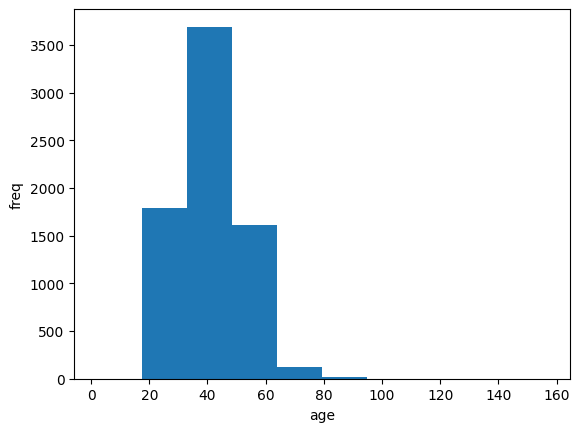

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(bank_df['age'])
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

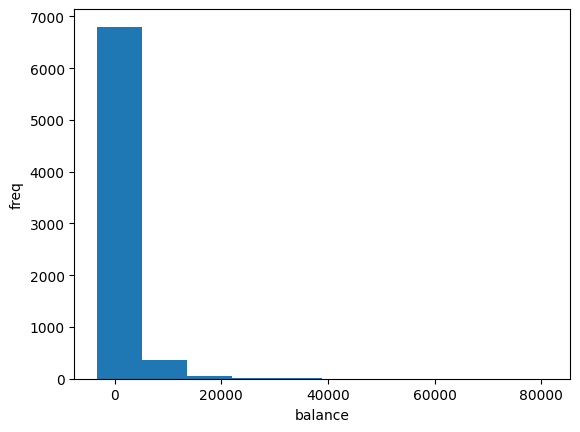

In [15]:
plt.hist(bank_df['balance'])
plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

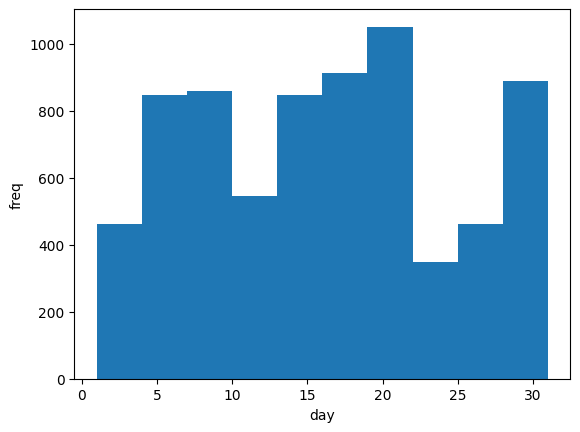

In [14]:
plt.hist(bank_df['day'])
plt.xlabel('day')
plt.ylabel('freq')
plt.show()

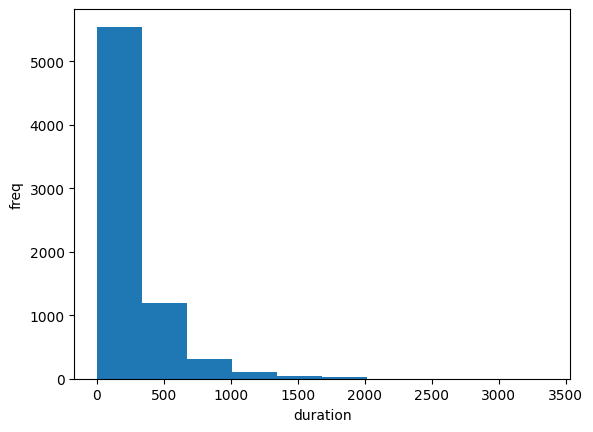

In [16]:
plt.hist(bank_df['duration'])
plt.xlabel('duration')
plt.ylabel('freq')
plt.show()

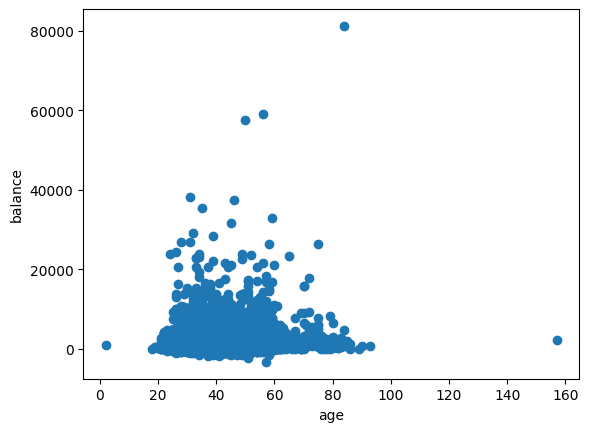

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [17]:
plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

bank_df[['age', 'balance']].corr()

In [18]:
bank_df[['age', 'balance', 'day', 'duration']].corr()

,age,balance,day,duration
age,1.000000,0.112364,-0.015818,0.006794
balance,0.112364,1.000000,0.011404,0.009340
day,-0.015818,0.011404,1.000000,-0.031867
duration,0.006794,0.009340,-0.031867,1.000000


In [19]:
print(bank_df['job'].value_counts(ascending=False, normalize=True))

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


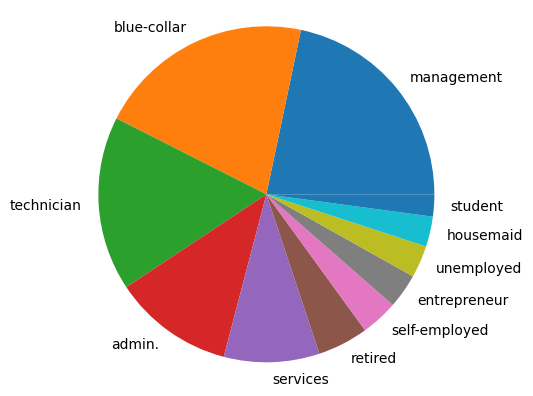

In [21]:
job_label = bank_df['job'].value_counts(ascending=False, normalize=True).index
job_val = bank_df['job'].value_counts(ascending=False, normalize=True).values
plt.pie(job_val, labels=job_label)
plt.axis('equal')
plt.show()

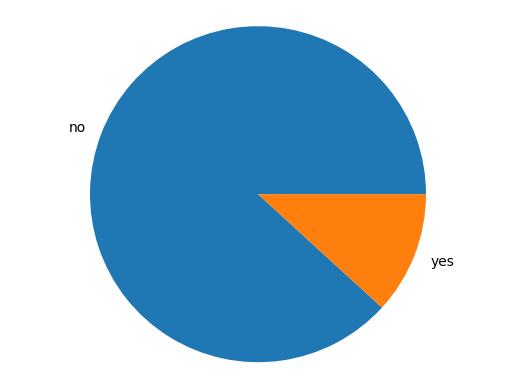

In [22]:
y_label = bank_df['y'].value_counts(ascending=False, normalize=True).index
y_vals = bank_df['y'].value_counts(ascending=False, normalize=True).values

plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

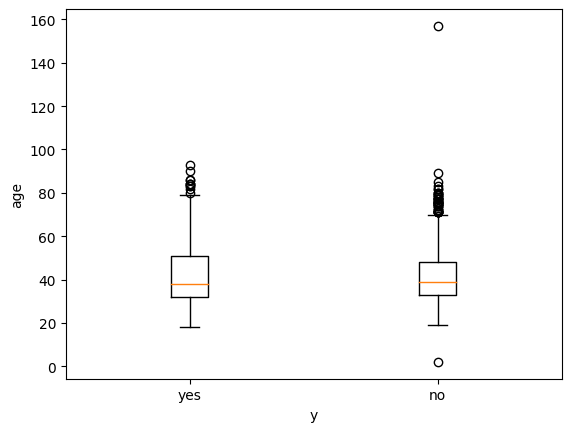

In [28]:
y_yes = bank_df[bank_df['y'] == 'yes']['age']
y_no = bank_df[bank_df['y'] == 'no']['age']

y_age = [y_yes, y_no]

plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
plt.setp(ax, xticklabels=['yes', 'no'])
plt.show()